In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from config import PARQUET_FILE

In [2]:
df = spark.read.parquet(PARQUET_FILE)

In [8]:
print(df.count())

2058


In [9]:
df.createOrReplaceTempView("washing")
spark.sql("""
SELECT *
FROM washing
LIMIT 10
""").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [10]:
res = spark.sql("""
SELECT voltage
FROM washing
WHERE voltage IS NOT NULL
""")
res_arr = res.rdd.map(lambda row: row.voltage).sample(False, 0.1).collect()

In [11]:
res_arr[:15]

[235, 228, 220, 224, 235, 221, 238, 224, 224, 228, 221, 233, 238, 232, 229]

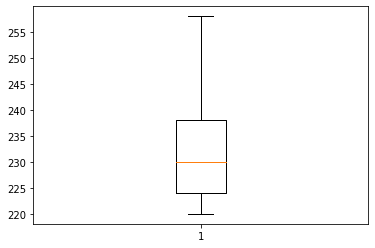

In [12]:
plt.boxplot(res_arr)
plt.show()